<a href="https://colab.research.google.com/github/samtam0714/data-analysis-google/blob/master/KMeanslwithPCA_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Load Dataset
dataset = pd.read_csv('./wineNew.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Set x and y variable
x = dataset.values

In [ ]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
data_transformed=sc.transform(x)

In [ ]:
# Determine Number of Components for DR
from sklearn.decomposition import PCA

#PCA Ratios
pca_none = PCA(n_components=None)
X_pca = pca_none.fit(data_transformed, y=None)
pca_var_ratios = pca_none.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

#Number of components
n_comppca=select_n_components(pca_var_ratios, 0.95)

#Reduced Data
reduced_data = PCA(n_components=n_comppca).fit_transform(data_transformed)

In [ ]:
#Create Silhouette Coefficients
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(reduced_data)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.25931695553182543
For n_clusters=3, The Silhouette Coefficient is 0.2848589191898987
For n_clusters=4, The Silhouette Coefficient is 0.2446499944731907
For n_clusters=5, The Silhouette Coefficient is 0.23223321744781808
For n_clusters=6, The Silhouette Coefficient is 0.13570239623406966
For n_clusters=7, The Silhouette Coefficient is 0.20250469719284947
For n_clusters=8, The Silhouette Coefficient is 0.14734553463539146
For n_clusters=9, The Silhouette Coefficient is 0.13344785279331406


In [ ]:
#Create KMeans with 3 Clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [ ]:
#Apply KMeans clustering
y_kmeans = kmeans.fit_predict(x)

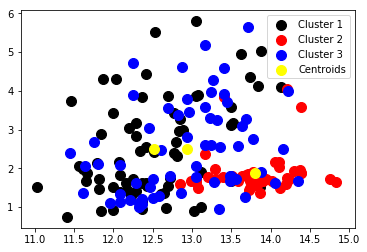

In [ ]:
#Plot of Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [ ]:
#Create Revised Dataset
dataset2=dataset
dataset2['kmeans_pred'] = y_kmeans
dataset2['kmeans_pred'] = dataset2['kmeans_pred'].map({0:'Cluster 1', 1:'Cluster 2',2:'Cluster 3'}) 
dataset2.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 3
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,Cluster 2
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,Cluster 2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,Cluster 2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,Cluster 2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,Cluster 2
